## Gradio Pets

In [2]:
from fastai.vision.all import *
import timm

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

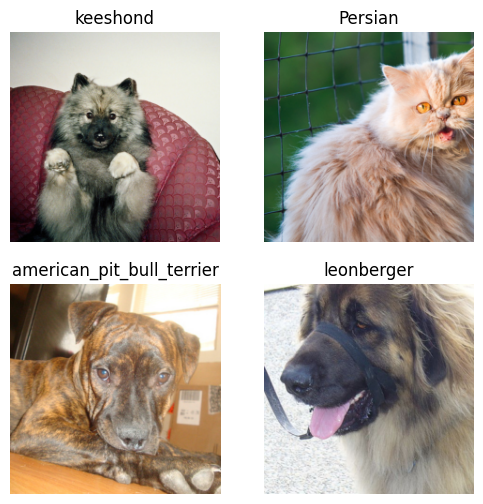

In [4]:
dls.show_batch(max_n=4)

In [6]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.489535,0.316024,0.114344,01:05


epoch,train_loss,valid_loss,error_rate,time
0,0.441606,0.347045,0.103518,01:16
1,0.291310,0.290795,0.087957,01:14
2,0.141965,0.226876,0.064953,01:14


We could try a better model, based on [this analysis](https://www.kaggle.com/code/jhoward/which-image-models-are-best/). The convnext models work great!

In [9]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_atto_rms',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnext_zepto_rms',
 'convnext_zepto_rms_ols',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [5]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

/Users/bytedance/venv/lib/python3.13/site-packages/timm/models/_factory.py:138: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/178M [00:00<?, ?B/s]

/Users/bytedance/venv/lib/python3.13/site-packages/torch/amp/autocast_mode.py:270: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/Users/bytedance/venv/lib/python3.13/site-packages/fastai/callback/fp16.py:47: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  self.autocast,self.learn.scaler,self.scales = autocast('cuda', dtype=dtype),GradScaler('cuda', **self.kwargs),L()


epoch,train_loss,valid_loss,error_rate,time
0,1.093968,0.275363,0.087280,02:17


epoch,train_loss,valid_loss,error_rate,time
0,0.284548,0.199501,0.067659,03:09
1,0.191413,0.174641,0.056157,03:09
2,0.121273,0.163176,0.051421,03:11


In [6]:
learn.export('model.pkl')